# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Mochammad Wahyu Ramadhan
- **Email:** wahyuramadhan9090@gmail.com
- **ID Dicoding:** wahyuramadhan

## Menentukan Pertanyaan

- Bagaimana dinamika konsentrasi PM2.5 sepanjang tahun 2013–2017 berdasarkan data historis??
- Bagaimana variasi konsentrasi PM2.5 antar stasiun pengukuran jika dibandingkan dalam periode 2013–2017?


## Import Semua Packages/Library yang Digunakan

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
import matplotlib.dates as mdates

## Data Wrangling

### Gathering Data

In [20]:
from pathlib import Path

data_dir = Path("data")
csv_files = [file.name for file in data_dir.glob("*.csv")]

csv_files

['PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Shunyi_20130301-20170228.csv']

In [21]:
from pathlib import Path
import shutil

source_dir = Path("/content")
target_dir = source_dir / "data"
target_dir.mkdir(exist_ok=True)

for csv_file in source_dir.glob("*.csv"):
    shutil.move(str(csv_file), target_dir / csv_file.name)

In [22]:
from pathlib import Path

data_dir = Path("data")
csv_files = [file.name for file in data_dir.glob("*.csv")]

In [23]:
from pathlib import Path

data_dir = Path(path)

air_quality_df = pd.concat(
    [pd.read_csv(data_dir / file) for file in csv_files],
    ignore_index=True
)

air_quality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [24]:
print(f"Total file CSV yang digunakan: {len(csv_files)}")

print("Daftar file CSV:")
for name in csv_files:
    print(f"- {name}")

Total file CSV yang digunakan: 12
Daftar file CSV:
- PRSA_Data_Gucheng_20130301-20170228.csv
- PRSA_Data_Nongzhanguan_20130301-20170228.csv
- PRSA_Data_Huairou_20130301-20170228.csv
- PRSA_Data_Tiantan_20130301-20170228.csv
- PRSA_Data_Guanyuan_20130301-20170228.csv
- PRSA_Data_Dingling_20130301-20170228.csv
- PRSA_Data_Wanliu_20130301-20170228.csv
- PRSA_Data_Dongsi_20130301-20170228.csv
- PRSA_Data_Aotizhongxin_20130301-20170228.csv
- PRSA_Data_Wanshouxigong_20130301-20170228.csv
- PRSA_Data_Changping_20130301-20170228.csv
- PRSA_Data_Shunyi_20130301-20170228.csv


**Insight:**
- Data kualitas udara dihimpun dari beberapa file CSV yang masing-masing merepresentasikan stasiun pemantauan berbeda.

- Penggabungan data ini memungkinkan analisis kondisi PM2.5 secara menyeluruh, baik dari sisi temporal maupun perbedaan antar lokasi pengukuran.

### Assessing Data

In [25]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [26]:
missing_summary = pd.DataFrame({
    "Nama Kolom": air_quality_df.columns,
    "Jumlah Nilai Kosong": air_quality_df.isna().sum(),
    "Persentase Nilai Kosong (%)": air_quality_df.isna().mean() * 100
})

missing_summary

,Nama Kolom,Jumlah Nilai Kosong,Persentase Nilai Kosong (%)
No,No,0,0.000000
year,year,0,0.000000
month,month,0,0.000000
day,day,0,0.000000
hour,hour,0,0.000000
PM2.5,PM2.5,8739,2.076916
PM10,PM10,6449,1.532674
SO2,SO2,9021,2.143937
NO2,NO2,12116,2.879497
CO,CO,20701,4.919813


In [27]:
total_duplicates = air_quality_df.duplicated().sum()
print(f"Total baris duplikat pada dataset: {total_duplicates}")

Total baris duplikat pada dataset: 0


In [28]:
air_quality_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [29]:
categorical_cols = ['station', 'year', 'month', 'day', 'hour', 'wd']

for col in categorical_cols:
    values = air_quality_df[col].unique()
    print(f"Kolom {col}: {len(values)} kategori unik")
    print(values)
    print("-" * 50)

Kolom station: 12 kategori unik
['Gucheng' 'Nongzhanguan' 'Huairou' 'Tiantan' 'Guanyuan' 'Dingling'
 'Wanliu' 'Dongsi' 'Aotizhongxin' 'Wanshouxigong' 'Changping' 'Shunyi']
--------------------------------------------------
Kolom year: 5 kategori unik
[2013 2014 2015 2016 2017]
--------------------------------------------------
Kolom month: 12 kategori unik
[ 3  4  5  6  7  8  9 10 11 12  1  2]
--------------------------------------------------
Kolom day: 31 kategori unik
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
--------------------------------------------------
Kolom hour: 24 kategori unik
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
--------------------------------------------------
Kolom wd: 17 kategori unik
['NW' 'WNW' 'W' 'E' 'ENE' 'NE' 'ESE' 'SSE' 'NNE' 'SW' 'SSW' 'S' 'SE' 'NNW'
 'N' 'WSW' nan]
--------------------------------------------------


**Insight:**
= Hasil eksplorasi awal menunjukkan bahwa dataset terdiri dari variabel numerik dan kategorikal yang relevan untuk analisis kualitas udara.

= Ditemukan adanya nilai hilang pada beberapa parameter polutan dan meteorologi, dengan proporsi tertinggi berada pada variabel CO, sehingga diperlukan tahap penanganan data sebelum analisis lanjutan.

### Cleaning Data

In [30]:
numeric_cols = air_quality_df.select_dtypes(include="number").columns

station_mean = (
    air_quality_df
    .groupby("station")[numeric_cols]
    .mean()
    .reset_index()
)

print("Ringkasan nilai rata-rata variabel numerik berdasarkan stasiun:")
station_mean

Ringkasan nilai rata-rata variabel numerik berdasarkan stasiun:


,station,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,Aotizhongxin,17532.5,2014.66256,6.52293,15.729637,11.5,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
1,Changping,17532.5,2014.66256,6.52293,15.729637,11.5,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
2,Dingling,17532.5,2014.66256,6.52293,15.729637,11.5,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
3,Dongsi,17532.5,2014.66256,6.52293,15.729637,11.5,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
4,Guanyuan,17532.5,2014.66256,6.52293,15.729637,11.5,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
5,Gucheng,17532.5,2014.66256,6.52293,15.729637,11.5,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
6,Huairou,17532.5,2014.66256,6.52293,15.729637,11.5,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
7,Nongzhanguan,17532.5,2014.66256,6.52293,15.729637,11.5,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
8,Shunyi,17532.5,2014.66256,6.52293,15.729637,11.5,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
9,Tiantan,17532.5,2014.66256,6.52293,15.729637,11.5,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785


In [31]:
cat_cols = air_quality_df.select_dtypes(include="object").columns.tolist()
cat_cols = [col for col in cat_cols if col != "station"]

station_mode = (
    air_quality_df
    .groupby("station")[cat_cols]
    .agg(lambda x: x.mode().iat[0])
    .reset_index()
)

print("Ringkasan nilai modus variabel kategorikal berdasarkan stasiun:")
station_mode

Ringkasan nilai modus variabel kategorikal berdasarkan stasiun:


,station,wd
0,Aotizhongxin,NE
1,Changping,NNW
2,Dingling,NNW
3,Dongsi,ENE
4,Guanyuan,NE
5,Gucheng,N
6,Huairou,NW
7,Nongzhanguan,ENE
8,Shunyi,NNE
9,Tiantan,ENE


In [32]:
# Identifikasi kolom numerik dan kategorikal
num_cols = air_quality_df.select_dtypes(include="number").columns
cat_cols = air_quality_df.select_dtypes(include="object").columns

# Imputasi nilai numerik dengan rata-rata per stasiun
air_quality_df[num_cols] = (
    air_quality_df
    .groupby("station")[num_cols]
    .transform(lambda x: x.fillna(x.mean()))
)

# Imputasi nilai kategorikal dengan modus per stasiun
air_quality_df[cat_cols] = (
    air_quality_df
    .groupby("station")[cat_cols]
    .transform(lambda x: x.fillna(x.mode().iat[0]))
)

air_quality_df.info()
air_quality_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.000000,55.871075,800.000000,88.000000,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.000000,55.871075,800.000000,88.000000,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,15.366162,55.871075,700.000000,52.000000,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.000000,55.871075,1323.974423,57.694879,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.000000,55.871075,600.000000,73.000000,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [33]:
air_quality_df["datetime"] = pd.to_datetime(
    air_quality_df[["year", "month", "day", "hour"]]
)

air_quality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,6.0,18.0,5.000000,55.871075,800.000000,88.000000,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,15.0,5.000000,55.871075,800.000000,88.000000,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,18.0,15.366162,55.871075,700.000000,52.000000,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,20.0,6.000000,55.871075,1323.974423,57.694879,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,17.0,5.000000,55.871075,600.000000,73.000000,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng,2013-03-01 04:00:00


In [34]:
air_quality_df.to_csv("air_quality_cleaned.csv", index=False)

**Insight:**
- Proses penanganan nilai hilang dilakukan dengan pendekatan berbasis stasiun pengukuran untuk mempertahankan karakteristik lokal pada setiap lokasi.

- Strategi ini diterapkan agar distribusi nilai numerik maupun kategorikal tetap mencerminkan kondisi masing-masing stasiun tanpa terpengaruh oleh perbedaan antar lokasi lain.

## Exploratory Data Analysis (EDA)

### Explore ...

In [35]:
air_quality_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.00000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Gucheng,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43699,NaN,35064,NaN
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.780235,104.578547,15.820683,50.583319,1230.62509,57.349235,13.538931,1010.746341,2.490654,0.064475,NaN,1.729701,NaN,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.00000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.00000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,83.739723,8.000000,44.000000,900.00000,47.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.00000,80.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.00000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN,2017-02-28 23:00:00


In [36]:
daily_pm25 = (
    air_quality_df
    .set_index("datetime")
    .groupby("station")["PM2.5"]
    .resample("D")
    .mean()
    .reset_index()
)

daily_pm25.head()

,station,datetime,PM2.5
0,Aotizhongxin,2013-03-01,7.125000
1,Aotizhongxin,2013-03-02,30.750000
2,Aotizhongxin,2013-03-03,76.916667
3,Aotizhongxin,2013-03-04,22.708333
4,Aotizhongxin,2013-03-05,148.875000


In [37]:
pm25_stats = (
    daily_pm25
    .groupby("station")["PM2.5"]
    .agg(
        Rata_rata="mean",
        Minimum="min",
        Maksimum="max",
        Standar_Deviasi="std"
    )
    .reset_index()
)

pm25_stats

,station,Rata_rata,Minimum,Maksimum,Standar_Deviasi
0,Aotizhongxin,82.773611,5.500000,512.291667,68.815098
1,Changping,71.099743,5.083333,433.458333,61.081048
2,Dingling,65.989497,4.041667,418.625000,61.764352
3,Dongsi,86.194297,3.000000,567.416667,72.743748
4,Guanyuan,82.933372,5.125000,536.083333,68.514740
5,Gucheng,83.852089,5.333333,519.750000,69.704417
6,Huairou,69.626367,3.208333,445.958333,59.319898
7,Nongzhanguan,84.838483,5.625000,496.118270,72.261682
8,Shunyi,79.491602,4.375000,514.625000,66.053351
9,Tiantan,82.164911,5.416667,499.333333,68.380128


In [38]:
monthly_pm25 = (
    air_quality_df
    .set_index("datetime")
    .groupby("station")["PM2.5"]
    .resample("M")
    .mean()
    .reset_index()
)

monthly_pm25.head()

/tmp/ipython-input-4185768782.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


,station,datetime,PM2.5
0,Aotizhongxin,2013-03-31,110.092742
1,Aotizhongxin,2013-04-30,62.751389
2,Aotizhongxin,2013-05-31,84.981918
3,Aotizhongxin,2013-06-30,106.128223
4,Aotizhongxin,2013-07-31,68.911290


In [39]:
pm25_monthly_stats = (
    monthly_pm25
    .groupby("station")["PM2.5"]
    .agg(
        Rata_rata="mean",
        Minimum="min",
        Maksimum="max",
        Standar_Deviasi="std"
    )
    .reset_index()
)

pm25_monthly_stats

,station,Rata_rata,Minimum,Maksimum,Standar_Deviasi
0,Aotizhongxin,82.773885,44.977147,153.299681,25.201047
1,Changping,71.141575,36.777954,136.232729,23.019363
2,Dingling,66.048706,35.321138,142.427759,22.914690
3,Dongsi,86.216620,43.510895,161.718226,26.835143
4,Guanyuan,82.948707,41.254119,154.243818,25.424074
5,Gucheng,83.876730,43.543478,165.363603,26.929962
6,Huairou,69.674205,38.489602,144.124133,22.078906
7,Nongzhanguan,84.868503,42.326003,161.023367,27.838383
8,Shunyi,79.543353,44.295563,151.487695,25.064697
9,Tiantan,82.174585,45.036630,157.920227,25.583772


In [40]:
annual_pm25 = (
    air_quality_df
    .set_index("datetime")
    .groupby("station")["PM2.5"]
    .resample("Y")
    .mean()
    .reset_index()
)

annual_pm25.head()

/tmp/ipython-input-3103958458.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample("Y")


,station,datetime,PM2.5
0,Aotizhongxin,2013-12-31,82.393043
1,Aotizhongxin,2014-12-31,90.333581
2,Aotizhongxin,2015-12-31,82.134578
3,Aotizhongxin,2016-12-31,74.279022
4,Aotizhongxin,2017-12-31,94.626679


In [41]:
pm25_annual_stats = (
    annual_pm25
    .groupby("station")["PM2.5"]
    .agg(
        Rata_rata="mean",
        Minimum="min",
        Maksimum="max",
        Standar_Deviasi="std"
    )
    .reset_index()
)

pm25_annual_stats

,station,Rata_rata,Minimum,Maksimum,Standar_Deviasi
0,Aotizhongxin,84.753381,74.279022,94.626679,7.917736
1,Changping,72.648944,61.778503,80.012286,7.473876
2,Dingling,66.349396,60.042212,73.949575,5.171615
3,Dongsi,89.060802,80.465800,103.130529,8.396052
4,Guanyuan,84.546942,77.228560,92.691009,5.999148
5,Gucheng,86.696167,77.530704,101.143993,9.080697
6,Huairou,70.370464,61.277062,77.011450,6.007594
7,Nongzhanguan,87.602161,76.155790,101.386979,9.234150
8,Shunyi,82.095231,72.051435,95.421874,8.775389
9,Tiantan,84.881423,74.035380,98.140631,8.716211


**Insight:**
- Dataset kualitas udara memiliki cakupan observasi yang luas dengan resolusi data per jam, sehingga mendukung analisis pola dan perubahan PM2.5 dalam jangka panjang.

- Informasi arah angin menunjukkan dominasi beberapa kategori tertentu, yang dapat berperan dalam memengaruhi sebaran dan konsentrasi polutan udara di setiap stasiun pengukuran.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana dinamika konsentrasi PM2.5 sepanjang tahun 2013–2017 berdasarkan data historis??

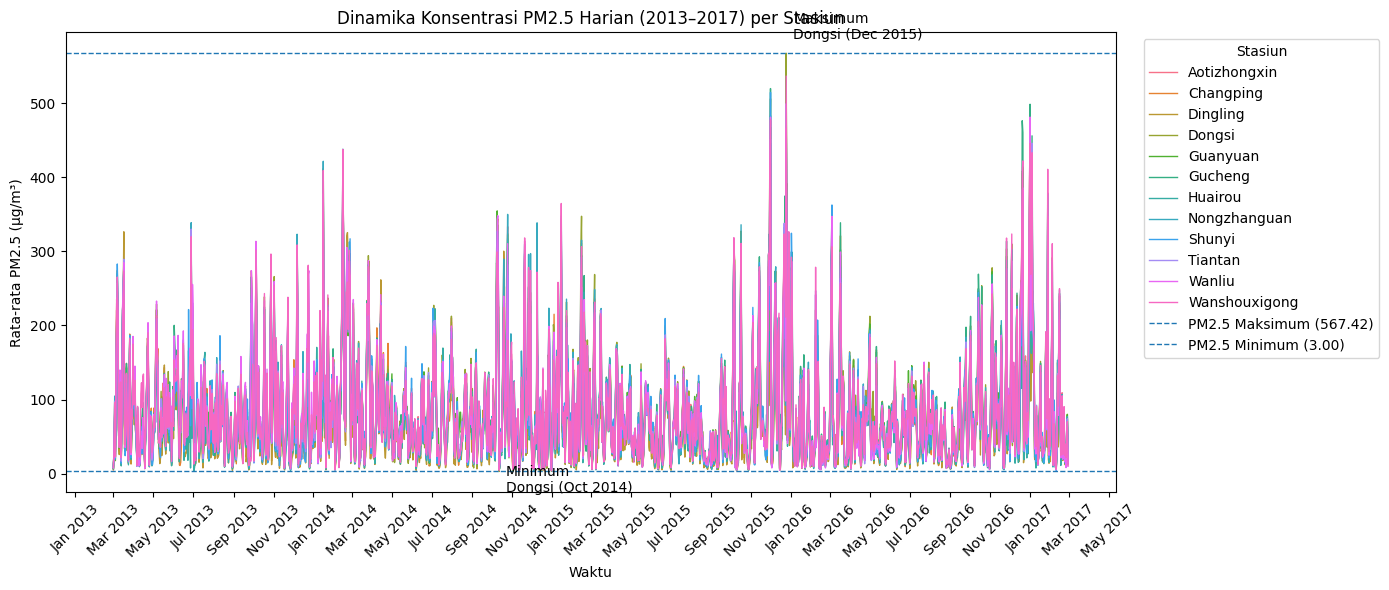

In [42]:
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=daily_pm25,
    x="datetime",
    y="PM2.5",
    hue="station",
    linewidth=1
)

plt.title("Dinamika Konsentrasi PM2.5 Harian (2013–2017) per Stasiun")
plt.xlabel("Waktu")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")

# Format sumbu waktu
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)

# Garis nilai ekstrem global
pm25_max = daily_pm25["PM2.5"].max()
pm25_min = daily_pm25["PM2.5"].min()

plt.axhline(pm25_max, linestyle="--", linewidth=1,
            label=f"PM2.5 Maksimum ({pm25_max:.2f})")
plt.axhline(pm25_min, linestyle="--", linewidth=1,
            label=f"PM2.5 Minimum ({pm25_min:.2f})")

# Anotasi titik ekstrem
max_row = daily_pm25.loc[daily_pm25["PM2.5"].idxmax()]
min_row = daily_pm25.loc[daily_pm25["PM2.5"].idxmin()]

plt.annotate(
    f"Maksimum\n{max_row['station']} ({max_row['datetime'].strftime('%b %Y')})",
    xy=(max_row["datetime"], pm25_max),
    xytext=(5, 10),
    textcoords="offset points"
)

plt.annotate(
    f"Minimum\n{min_row['station']} ({min_row['datetime'].strftime('%b %Y')})",
    xy=(min_row["datetime"], pm25_min),
    xytext=(5, -15),
    textcoords="offset points"
)

plt.legend(title="Stasiun", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

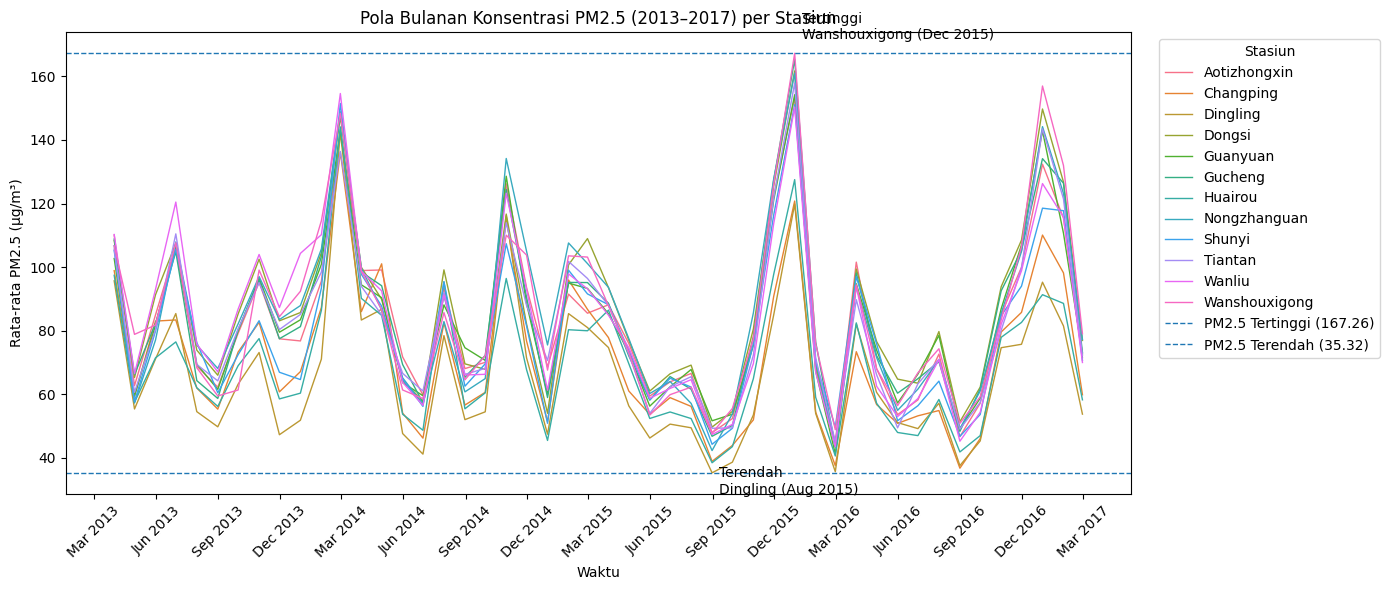

In [43]:
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=monthly_pm25,
    x="datetime",
    y="PM2.5",
    hue="station",
    linewidth=1
)

plt.title("Pola Bulanan Konsentrasi PM2.5 (2013–2017) per Stasiun")
plt.xlabel("Waktu")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")

# Format sumbu waktu
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)

# Garis nilai ekstrem global
pm25_max = monthly_pm25["PM2.5"].max()
pm25_min = monthly_pm25["PM2.5"].min()

plt.axhline(pm25_max, linestyle="--", linewidth=1,
            label=f"PM2.5 Tertinggi ({pm25_max:.2f})")
plt.axhline(pm25_min, linestyle="--", linewidth=1,
            label=f"PM2.5 Terendah ({pm25_min:.2f})")

# Anotasi titik ekstrem
max_row = monthly_pm25.loc[monthly_pm25["PM2.5"].idxmax()]
min_row = monthly_pm25.loc[monthly_pm25["PM2.5"].idxmin()]

plt.annotate(
    f"Tertinggi\n{max_row['station']} ({max_row['datetime'].strftime('%b %Y')})",
    xy=(max_row["datetime"], pm25_max),
    xytext=(5, 10),
    textcoords="offset points"
)

plt.annotate(
    f"Terendah\n{min_row['station']} ({min_row['datetime'].strftime('%b %Y')})",
    xy=(min_row["datetime"], pm25_min),
    xytext=(5, -15),
    textcoords="offset points"
)

plt.legend(title="Stasiun", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Pertanyaan 2: Sejauh mana perbedaan konsentrasi PM2.5 antar stasiun pemantauan selama periode pengamatan 2013–2017?

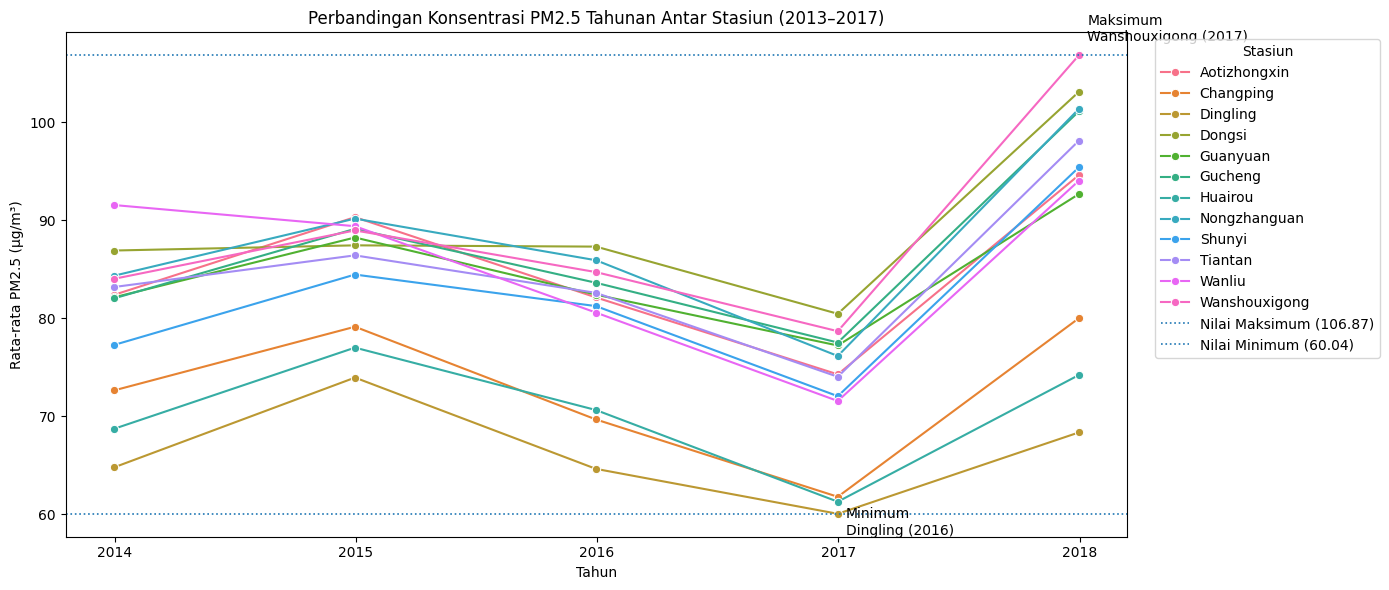

In [44]:
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=annual_pm25,
    x="datetime",
    y="PM2.5",
    hue="station",
    marker="o",
    linewidth=1.5
)

plt.title("Perbandingan Konsentrasi PM2.5 Tahunan Antar Stasiun (2013–2017)")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")

# Format sumbu X (tahun)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Garis referensi nilai ekstrem
pm25_max = annual_pm25["PM2.5"].max()
pm25_min = annual_pm25["PM2.5"].min()

plt.axhline(pm25_max, linestyle=":", linewidth=1.2,
            label=f"Nilai Maksimum ({pm25_max:.2f})")
plt.axhline(pm25_min, linestyle=":", linewidth=1.2,
            label=f"Nilai Minimum ({pm25_min:.2f})")

# Anotasi titik ekstrem
max_point = annual_pm25.loc[annual_pm25["PM2.5"].idxmax()]
min_point = annual_pm25.loc[annual_pm25["PM2.5"].idxmin()]

plt.annotate(
    f"Maksimum\n{max_point['station']} ({max_point['datetime'].year})",
    xy=(max_point["datetime"], pm25_max),
    xytext=(6, 10),
    textcoords="offset points"
)

plt.annotate(
    f"Minimum\n{min_point['station']} ({min_point['datetime'].year})",
    xy=(min_point["datetime"], pm25_min),
    xytext=(6, -15),
    textcoords="offset points"
)

plt.legend(title="Stasiun", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

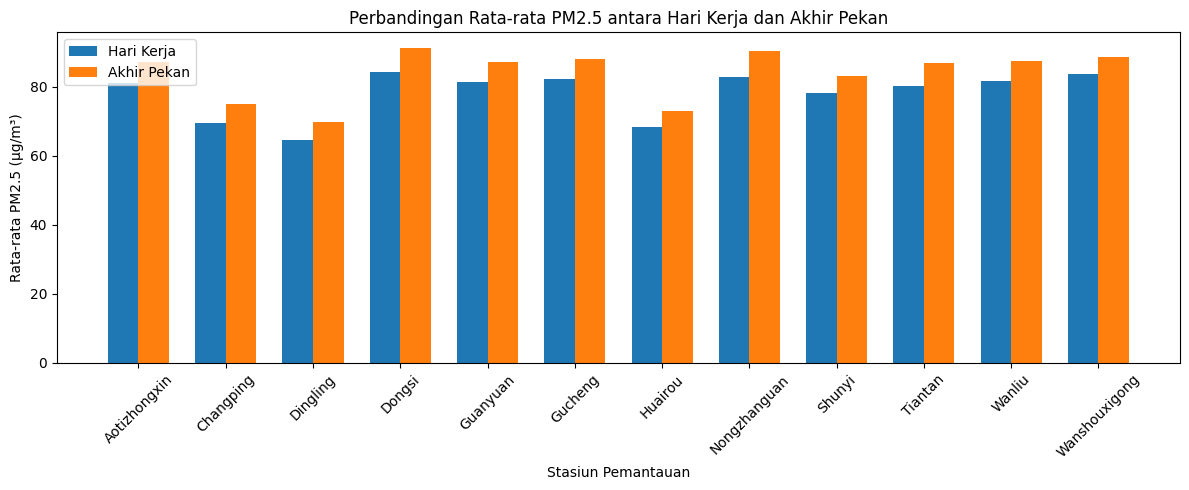

In [45]:
# Klasifikasi hari kerja dan akhir pekan
air_quality_df["weekday"] = air_quality_df["datetime"].dt.weekday
air_quality_df["jenis_hari"] = np.where(
    air_quality_df["weekday"] < 5,
    "Hari Kerja",
    "Akhir Pekan"
)

# Rata-rata PM2.5 berdasarkan stasiun dan jenis hari
pm25_daytype_avg = (
    air_quality_df
    .groupby(["station", "jenis_hari"])["PM2.5"]
    .mean()
    .reset_index()
)

# Pivot untuk visualisasi
pm25_pivot = pm25_daytype_avg.pivot(
    index="station",
    columns="jenis_hari",
    values="PM2.5"
)

# Visualisasi bar chart
stations = pm25_pivot.index
x = np.arange(len(stations))
width = 0.35

plt.figure(figsize=(12, 5))
plt.bar(x - width/2, pm25_pivot["Hari Kerja"], width, label="Hari Kerja")
plt.bar(x + width/2, pm25_pivot["Akhir Pekan"], width, label="Akhir Pekan")

plt.title("Perbandingan Rata-rata PM2.5 antara Hari Kerja dan Akhir Pekan")
plt.xlabel("Stasiun Pemantauan")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")
plt.xticks(x, stations, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

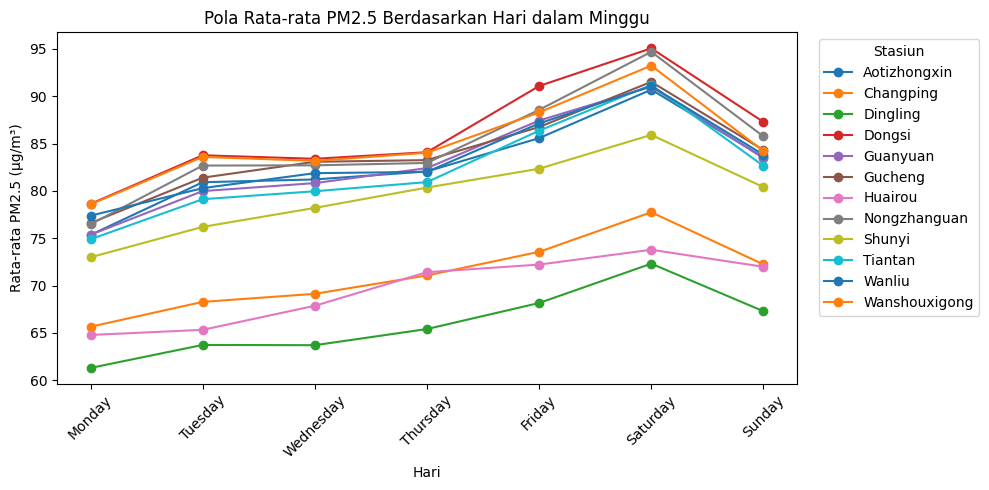

In [46]:
# Nama hari dalam minggu
air_quality_df["weekday"] = air_quality_df["datetime"].dt.day_name()

day_sequence = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

# Rata-rata PM2.5 per stasiun dan hari
pm25_weekday_avg = (
    air_quality_df
    .groupby(["station", "weekday"])["PM2.5"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 5))

for station in pm25_weekday_avg["station"].unique():
    data_station = pm25_weekday_avg[pm25_weekday_avg["station"] == station]
    data_station = (
        data_station
        .set_index("weekday")
        .reindex(day_sequence)
    )

    plt.plot(
        day_sequence,
        data_station["PM2.5"],
        marker="o",
        label=station
    )

plt.title("Pola Rata-rata PM2.5 Berdasarkan Hari dalam Minggu")
plt.xlabel("Hari")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.legend(title="Stasiun", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

**Insight:**

- Hasil visualisasi menunjukkan bahwa seluruh stasiun pemantauan memiliki pola fluktuasi konsentrasi PM2.5 yang relatif serupa dari waktu ke waktu. Hal ini mengindikasikan adanya dinamika temporal yang konsisten di berbagai lokasi pengukuran. Selain itu, terlihat pola musiman yang cukup jelas, di mana konsentrasi PM2.5 cenderung meningkat pada periode tertentu dalam setahun dan menurun pada periode lainnya.

- Analisis berdasarkan hari dalam minggu menunjukkan adanya variasi konsentrasi PM2.5 antar hari. Secara umum, rata-rata konsentrasi PM2.5 mengalami peningkatan menjelang akhir pekan. Pada sebagian besar stasiun, nilai PM2.5 pada akhir pekan tercatat sedikit lebih tinggi dibandingkan hari kerja, dengan konsentrasi tertinggi umumnya terjadi pada hari Sabtu.

- Stasiun yang secara konsisten memiliki tingkat polusi lebih tinggi menunjukkan peningkatan konsentrasi PM2.5 yang lebih tajam menjelang akhir pekan. Sementara itu, stasiun dengan tingkat PM2.5 yang relatif lebih rendah tetap mengikuti pola serupa, meskipun berada pada level konsentrasi yang lebih rendah.


## Analisis Lanjutan (Opsional)

## Conclusion

Conclusion

Berdasarkan analisis data historis periode 2013–2017, konsentrasi PM2.5 menunjukkan pola fluktuatif yang konsisten sepanjang waktu dengan kecenderungan meningkat pada periode akhir tahun dan menurun pada pertengahan tahun. Pola dinamika ini muncul di seluruh stasiun pemantauan, meskipun tingkat konsentrasi yang tercatat berbeda antar lokasi. Beberapa stasiun secara konsisten mencatat rata-rata PM2.5 yang lebih tinggi dibandingkan stasiun lainnya, sementara stasiun dengan konsentrasi lebih rendah tetap mengikuti pola fluktuasi yang serupa. Analisis tambahan menunjukkan bahwa konsentrasi PM2.5 cenderung meningkat menjelang akhir pekan, dengan nilai rata-rata tertinggi umumnya terjadi pada hari Sabtu.

Sebagai rekomendasi, pemangku kepentingan disarankan untuk memfokuskan upaya pengendalian kualitas udara pada periode dan wilayah dengan konsentrasi PM2.5 yang relatif tinggi, khususnya pada akhir tahun dan di stasiun dengan tingkat polusi tertinggi. Selain itu, penguatan sistem pemantauan, penerapan kebijakan berbasis lokasi, serta peningkatan kesadaran masyarakat terkait dampak aktivitas harian terhadap kualitas udara dapat dipertimbangkan sebagai langkah preventif dalam pengelolaan kualitas udara jangka panjang.